In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

import os
import sys
__file__ = './'
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))

# os.path.dirname(__file__)获取当前文件的绝对路径
# os.path.join(xx,'..')在后面追加..，相当于进入上一级目录
# os.path.abspath(xx)获取绝对路径
# sys.path.append()将其加入系统路径当中

import MSA
import LINK

In [4]:
# read data
my_link = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\Nguyen_Dupuis_0515.xlsx', sheet_name='link_info')
my_link['I'] = 0
my_node = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\Nguyen_Dupuis_0515.xlsx', sheet_name='node_info')
my_link['name'] = my_link['from'].astype('str') +'-'+ my_link['to'].astype('str')
my_demand = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\Nguyen_Dupuis_0515.xlsx', sheet_name='demand_info')
print(my_demand)


# set parameter
origin_zone = ['r1','r2']
destination_zone = ['s1','s2']
theta_1 = 1 # path 
theta_2 = 0.5 # mode
# miu_in = 25
miu_out = 50
lamda_0_hailing = 2 #2 RMB/minute
lamda_0_PR = 30 # RMB
lamda_0_transit = 5
N_hailing = 2000
lamda_0_auto = LINK.compute_lamda_0_auto(fuel_consumption=8.5)

df = []
VOT_lst = np.arange(10, 210, 10)
for miu_in in VOT_lst:
    result = MSA.assignment(my_link= my_link, my_node= my_node, my_demand= my_demand,
                            origin_zone= origin_zone, destination_zone= destination_zone,
                            miu_in= miu_in, miu_out= miu_out,
                            lamda_0_auto= lamda_0_auto,
                            lamda_0_hailing= lamda_0_hailing,
                            lamda_0_transit= lamda_0_transit,
                            lamda_0_PR= lamda_0_PR,
                            theta_1= theta_1, theta_2= theta_2,
                            N_hailing= N_hailing, A=2, maximum_iter=300)
    df.append(result)

# system cost
total_cost = []
for item in df:
    flow_set = item[2].tail(item[6])
    cost = sum(abs(flow_set['path_cost']) * flow_set['path_flow'])
    total_cost.append(cost)

# OD cost
def od_cost(path, od):
    cost = sum(abs(path[path['OD_pair'] == od]['path_cost']) * path[path['OD_pair'] == od]['path_flow']) / sum(path[path['OD_pair'] == od]['path_flow'])
    return cost

od_1_cost = []
od_2_cost = []
od_3_cost = []
od_4_cost = []
for i in range(len(df)):
    flow_set = df[i][2].tail(df[i][6])
    od_1_cost.append(od_cost(flow_set, 'r1-s1'))
    od_2_cost.append(od_cost(flow_set, 'r1-s2'))
    od_3_cost.append(od_cost(flow_set, 'r2-s1'))
    od_4_cost.append(od_cost(flow_set, 'r2-s2'))

# mode share
PR_logit = [df[i][4].tail(df[i][7]).iloc[0]['mode_logit'] for i in range(len(df))]
RT_logit = [df[i][4].tail(df[i][7]).iloc[1]['mode_logit'] for i in range(len(df))]
auto_logit = [df[i][4].tail(df[i][7]).iloc[2]['mode_logit'] for i in range(len(df))]
bus_logit = [df[i][4].tail(df[i][7]).iloc[3]['mode_logit'] for i in range(len(df))]

# ride-hailing vehicle number
n_idle = [df[i][5].tail(1).iloc[0]['n_idle'] for i in range(len(df))]
waiting_hailing = [df[i][5].tail(1).iloc[0]['wait_time'] for i in range(len(df))]

# convert to dataframe
dfx = pd.DataFrame({
        'VOT_in': VOT_lst,
        'n_idle': n_idle,
        'waiting time': waiting_hailing,
        'od_1_cost': od_1_cost,
        'od_2_cost': od_2_cost,
        'od_3_cost': od_3_cost,
        'od_4_cost': od_4_cost,
        'total_cost': total_cost,
        'auto_logit': auto_logit,
        'bus_logit': bus_logit,
        'PR_logit': PR_logit,
        'RT_logit': RT_logit,})

df_miu_in = dfx

  OD_pair  demand
0   r1-s1    2000
1   r1-s2    1500
2   r2-s1    1200
3   r2-s2    1000
0.6517
['path-1', 'path-2', 'path-3', 'path-4', 'path-5', 'path-6', 'path-7', 'path-8', 'path-9', 'path-10', 'path-11', 'path-12', 'path-13', 'path-14', 'path-15', 'path-16', 'path-17', 'path-18', 'path-19', 'path-20', 'path-21', 'path-22', 'path-23', 'path-24', 'path-25', 'path-26', 'path-27', 'path-28', 'path-29', 'path-30', 'path-31', 'path-32', 'path-33', 'path-34', 'path-35', 'path-36', 'path-37', 'path-38', 'path-39', 'path-40', 'path-41', 'path-42', 'path-43', 'path-44', 'path-45', 'path-46', 'path-47', 'path-48', 'path-49', 'path-50', 'path-51', 'path-52', 'path-53', 'path-54', 'path-55', 'path-56', 'path-57', 'path-58', 'path-59', 'path-60', 'path-61', 'path-62', 'path-63', 'path-64', 'path-65', 'path-66']
['auto', 'auto', 'auto', 'auto', 'auto', 'P&R', 'auto', 'auto', 'auto', 'P&R', 'auto', 'auto', 'auto', 'P&R', 'transit', 'R&T', 'R&T', 'R&T', 'R&T', 'R&T', 'auto', 'auto', 'auto', 'auto

In [5]:
df_miu_in

,VOT_in,n_idle,waiting time,od_1_cost,od_2_cost,od_3_cost,od_4_cost,total_cost,auto_logit,bus_logit,PR_logit,RT_logit
0,10,1760.505541,16.452427,139.313294,129.739915,120.565606,126.636139,187677.532551,0.314507,0.227182,0.186892,0.271419
1,20,1769.586924,16.415939,161.257637,148.556540,137.675409,140.623868,213697.951987,0.322104,0.225796,0.187720,0.264379
2,30,1777.675976,16.383652,182.154448,166.592733,154.432738,154.021659,238405.458634,0.328385,0.224779,0.188800,0.258035
3,40,1784.931273,16.354863,202.224621,184.061659,170.890118,166.987385,262066.432977,0.333468,0.224049,0.190141,0.252342
4,50,1791.423847,16.329236,221.634729,201.120982,187.119548,179.653721,284897.721439,0.337429,0.223556,0.191734,0.247281
5,60,1797.202965,16.306531,240.503051,217.883740,203.176571,192.118235,307058.493758,0.340331,0.223267,0.193559,0.242843
6,70,1802.306234,16.286564,258.920788,234.436586,219.107935,204.458134,328675.546889,0.342237,0.223155,0.195587,0.239020
7,80,1806.777622,16.269133,276.954424,250.840292,234.950092,216.729786,349841.336100,0.343215,0.223204,0.197782,0.235799
8,90,1810.654924,16.254065,294.662380,267.146684,250.736676,228.983146,370638.997351,0.343339,0.223398,0.200106,0.233158
9,100,1813.982158,16.241170,312.091332,283.394412,266.494945,241.257515,391133.942140,0.342692,0.223723,0.202518,0.231067


In [6]:
# read data
my_link = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\Nguyen_Dupuis_0515.xlsx', sheet_name='link_info')
my_link['I'] = 0
my_node = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\Nguyen_Dupuis_0515.xlsx', sheet_name='node_info')
my_link['name'] = my_link['from'].astype('str') +'-'+ my_link['to'].astype('str')
my_demand = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\Nguyen_Dupuis_0515.xlsx', sheet_name='demand_info')
print(my_demand)


# set parameter
origin_zone = ['r1','r2']
destination_zone = ['s1','s2']
theta_1 = 1 # path 
theta_2 = 0.5 # mode
miu_in = 25
# miu_out = 50
lamda_0_hailing = 2 #2 RMB/minute
lamda_0_PR = 30 # RMB
lamda_0_transit = 5
N_hailing = 2000
lamda_0_auto = LINK.compute_lamda_0_auto(fuel_consumption=8.5)

df = []
VOT_lst = np.arange(10, 210, 10)
for miu_out in VOT_lst:
    result = MSA.assignment(my_link= my_link, my_node= my_node, my_demand= my_demand,
                            origin_zone= origin_zone, destination_zone= destination_zone,
                            miu_in= miu_in, miu_out= miu_out,
                            lamda_0_auto= lamda_0_auto,
                            lamda_0_hailing= lamda_0_hailing,
                            lamda_0_transit= lamda_0_transit,
                            lamda_0_PR= lamda_0_PR,
                            theta_1= theta_1, theta_2= theta_2,
                            N_hailing= N_hailing, A=2, maximum_iter=300)
    df.append(result)

# system cost
total_cost = []
for item in df:
    flow_set = item[2].tail(item[6])
    cost = sum(abs(flow_set['path_cost']) * flow_set['path_flow'])
    total_cost.append(cost)

# OD cost
def od_cost(path, od):
    cost = sum(abs(path[path['OD_pair'] == od]['path_cost']) * path[path['OD_pair'] == od]['path_flow']) / sum(path[path['OD_pair'] == od]['path_flow'])
    return cost

od_1_cost = []
od_2_cost = []
od_3_cost = []
od_4_cost = []
for i in range(len(df)):
    flow_set = df[i][2].tail(df[i][6])
    od_1_cost.append(od_cost(flow_set, 'r1-s1'))
    od_2_cost.append(od_cost(flow_set, 'r1-s2'))
    od_3_cost.append(od_cost(flow_set, 'r2-s1'))
    od_4_cost.append(od_cost(flow_set, 'r2-s2'))

# mode share
PR_logit = [df[i][4].tail(df[i][7]).iloc[0]['mode_logit'] for i in range(len(df))]
RT_logit = [df[i][4].tail(df[i][7]).iloc[1]['mode_logit'] for i in range(len(df))]
auto_logit = [df[i][4].tail(df[i][7]).iloc[2]['mode_logit'] for i in range(len(df))]
bus_logit = [df[i][4].tail(df[i][7]).iloc[3]['mode_logit'] for i in range(len(df))]

# ride-hailing vehicle number
n_idle = [df[i][5].tail(1).iloc[0]['n_idle'] for i in range(len(df))]
waiting_hailing = [df[i][5].tail(1).iloc[0]['wait_time'] for i in range(len(df))]

# convert to dataframe
dfx = pd.DataFrame({
        'VOT_in': VOT_lst,
        'n_idle': n_idle,
        'waiting time': waiting_hailing,
        'od_1_cost': od_1_cost,
        'od_2_cost': od_2_cost,
        'od_3_cost': od_3_cost,
        'od_4_cost': od_4_cost,
        'total_cost': total_cost,
        'auto_logit': auto_logit,
        'bus_logit': bus_logit,
        'PR_logit': PR_logit,
        'RT_logit': RT_logit,})

df_miu_out = dfx

  OD_pair  demand
0   r1-s1    2000
1   r1-s2    1500
2   r2-s1    1200
3   r2-s2    1000
0.6517
['path-1', 'path-2', 'path-3', 'path-4', 'path-5', 'path-6', 'path-7', 'path-8', 'path-9', 'path-10', 'path-11', 'path-12', 'path-13', 'path-14', 'path-15', 'path-16', 'path-17', 'path-18', 'path-19', 'path-20', 'path-21', 'path-22', 'path-23', 'path-24', 'path-25', 'path-26', 'path-27', 'path-28', 'path-29', 'path-30', 'path-31', 'path-32', 'path-33', 'path-34', 'path-35', 'path-36', 'path-37', 'path-38', 'path-39', 'path-40', 'path-41', 'path-42', 'path-43', 'path-44', 'path-45', 'path-46', 'path-47', 'path-48', 'path-49', 'path-50', 'path-51', 'path-52', 'path-53', 'path-54', 'path-55', 'path-56', 'path-57', 'path-58', 'path-59', 'path-60', 'path-61', 'path-62', 'path-63', 'path-64', 'path-65', 'path-66']
['auto', 'auto', 'auto', 'auto', 'auto', 'P&R', 'auto', 'auto', 'auto', 'P&R', 'auto', 'auto', 'auto', 'P&R', 'transit', 'R&T', 'R&T', 'R&T', 'R&T', 'R&T', 'auto', 'auto', 'auto', 'auto

In [7]:
df_miu_out

,VOT_in,n_idle,waiting time,od_1_cost,od_2_cost,od_3_cost,od_4_cost,total_cost,auto_logit,bus_logit,PR_logit,RT_logit
0,10,1763.340685,16.441008,155.455486,140.752596,129.846631,124.277918,201079.463979,0.307852,0.228633,0.187715,0.275801
1,20,1766.064016,16.430063,159.619196,145.097374,133.999195,130.248966,207509.988513,0.312335,0.227792,0.187872,0.272001
2,30,1768.677900,16.419580,163.751275,149.370410,138.116129,136.113927,213867.869741,0.316754,0.226947,0.188010,0.268289
3,40,1771.236042,16.409340,167.820303,153.557738,142.149012,141.828348,220100.369071,0.321110,0.226099,0.188128,0.264663
4,50,1773.743561,16.399323,171.830477,157.664006,146.099589,147.391862,226212.452930,0.325397,0.225250,0.188227,0.261126
5,60,1776.198370,16.389535,175.783758,161.692237,149.970208,152.803842,232207.112737,0.329613,0.224400,0.188308,0.257680
6,70,1778.598677,16.379982,179.682173,165.645482,153.763260,158.063963,238087.498661,0.333753,0.223550,0.188372,0.254325
7,80,1780.942821,16.370670,183.527748,169.526764,157.481214,163.172229,243856.862635,0.337816,0.222702,0.188420,0.251063
8,90,1783.229282,16.361602,187.322503,173.339076,161.126601,168.128960,249518.545549,0.341799,0.221856,0.188452,0.247894
9,100,1785.456691,16.352785,191.068450,177.085365,164.702009,172.934789,255075.963220,0.345698,0.221012,0.188470,0.244819


In [2]:
# read data
my_link = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\Nguyen_Dupuis_0515.xlsx', sheet_name='link_info')
my_link['I'] = 0
my_node = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\Nguyen_Dupuis_0515.xlsx', sheet_name='node_info')
my_link['name'] = my_link['from'].astype('str') +'-'+ my_link['to'].astype('str')
my_demand = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\Nguyen_Dupuis_0515.xlsx', sheet_name='demand_info')
print(my_demand)


# set parameter
origin_zone = ['r1','r2']
destination_zone = ['s1','s2']
theta_1 = 1 # path 
theta_2 = 0.5 # mode
# miu_in = 25
# miu_out = 50
lamda_0_hailing = 2 #2 RMB/minute
lamda_0_PR = 30 # RMB
lamda_0_transit = 5
N_hailing = 2000
lamda_0_auto = LINK.compute_lamda_0_auto(fuel_consumption=8.5)

df = []
VOT_lst = np.arange(10, 210, 10)
for miu_in in VOT_lst:
    miu_out = 2 * miu_in
    result = MSA.assignment(my_link= my_link, my_node= my_node, my_demand= my_demand,
                            origin_zone= origin_zone, destination_zone= destination_zone,
                            miu_in= miu_in, miu_out= miu_out,
                            lamda_0_auto= lamda_0_auto,
                            lamda_0_hailing= lamda_0_hailing,
                            lamda_0_transit= lamda_0_transit,
                            lamda_0_PR= lamda_0_PR,
                            theta_1= theta_1, theta_2= theta_2,
                            N_hailing= N_hailing, A=2, maximum_iter=300)
    df.append(result)

# system cost
total_cost = []
for item in df:
    flow_set = item[2].tail(item[6])
    cost = sum(abs(flow_set['path_cost']) * flow_set['path_flow'])
    total_cost.append(cost)

# OD cost
def od_cost(path, od):
    cost = sum(abs(path[path['OD_pair'] == od]['path_cost']) * path[path['OD_pair'] == od]['path_flow']) / sum(path[path['OD_pair'] == od]['path_flow'])
    return cost

od_1_cost = []
od_2_cost = []
od_3_cost = []
od_4_cost = []
for i in range(len(df)):
    flow_set = df[i][2].tail(df[i][6])
    od_1_cost.append(od_cost(flow_set, 'r1-s1'))
    od_2_cost.append(od_cost(flow_set, 'r1-s2'))
    od_3_cost.append(od_cost(flow_set, 'r2-s1'))
    od_4_cost.append(od_cost(flow_set, 'r2-s2'))

# mode share
PR_logit = [df[i][4].tail(df[i][7]).iloc[0]['mode_logit'] for i in range(len(df))]
RT_logit = [df[i][4].tail(df[i][7]).iloc[1]['mode_logit'] for i in range(len(df))]
auto_logit = [df[i][4].tail(df[i][7]).iloc[2]['mode_logit'] for i in range(len(df))]
bus_logit = [df[i][4].tail(df[i][7]).iloc[3]['mode_logit'] for i in range(len(df))]

# ride-hailing vehicle number
n_idle = [df[i][5].tail(1).iloc[0]['n_idle'] for i in range(len(df))]
waiting_hailing = [df[i][5].tail(1).iloc[0]['wait_time'] for i in range(len(df))]

# convert to dataframe
dfx = pd.DataFrame({
        'VOT_in': VOT_lst,
        'n_idle': n_idle,
        'waiting time': waiting_hailing,
        'od_1_cost': od_1_cost,
        'od_2_cost': od_2_cost,
        'od_3_cost': od_3_cost,
        'od_4_cost': od_4_cost,
        'total_cost': total_cost,
        'auto_logit': auto_logit,
        'bus_logit': bus_logit,
        'PR_logit': PR_logit,
        'RT_logit': RT_logit,})

  OD_pair  demand
0   r1-s1    2000
1   r1-s2    1500
2   r2-s1    1200
3   r2-s2    1000
0.6517
['path-1', 'path-2', 'path-3', 'path-4', 'path-5', 'path-6', 'path-7', 'path-8', 'path-9', 'path-10', 'path-11', 'path-12', 'path-13', 'path-14', 'path-15', 'path-16', 'path-17', 'path-18', 'path-19', 'path-20', 'path-21', 'path-22', 'path-23', 'path-24', 'path-25', 'path-26', 'path-27', 'path-28', 'path-29', 'path-30', 'path-31', 'path-32', 'path-33', 'path-34', 'path-35', 'path-36', 'path-37', 'path-38', 'path-39', 'path-40', 'path-41', 'path-42', 'path-43', 'path-44', 'path-45', 'path-46', 'path-47', 'path-48', 'path-49', 'path-50', 'path-51', 'path-52', 'path-53', 'path-54', 'path-55', 'path-56', 'path-57', 'path-58', 'path-59', 'path-60', 'path-61', 'path-62', 'path-63', 'path-64', 'path-65', 'path-66']
['auto', 'auto', 'auto', 'auto', 'auto', 'P&R', 'auto', 'auto', 'auto', 'P&R', 'auto', 'auto', 'auto', 'P&R', 'transit', 'R&T', 'R&T', 'R&T', 'R&T', 'R&T', 'auto', 'auto', 'auto', 'auto

In [3]:
dfx

,VOT_in,n_idle,waiting time,od_1_cost,od_2_cost,od_3_cost,od_4_cost,total_cost,auto_logit,bus_logit,PR_logit,RT_logit
0,10,1751.962116,16.486988,126.325253,116.514627,107.703804,108.904707,167954.779771,0.300252,0.229853,0.186748,0.283147
1,20,1766.981751,16.426380,157.174282,144.391350,133.652905,135.012311,207494.344124,0.317677,0.226660,0.187646,0.268017
2,30,1780.029036,16.374298,186.044614,170.573061,158.241795,159.400029,244326.007588,0.332455,0.223944,0.188906,0.254695
3,40,1791.160450,16.330273,213.414728,195.564841,181.791758,182.550596,279143.687394,0.344538,0.221635,0.190557,0.243270
4,50,1800.379647,16.294093,239.646491,219.741981,204.594474,204.851387,312498.911716,0.353899,0.219714,0.192564,0.233822
5,60,1807.726295,16.265442,265.027936,243.394564,226.898790,226.608724,344837.370071,0.360596,0.218185,0.194856,0.226364
6,70,1813.314792,16.243754,289.798359,266.748071,248.918372,248.066185,376522.663150,0.364790,0.217056,0.197341,0.220813
7,80,1817.326904,16.228239,314.160485,289.978300,270.833646,269.416734,407850.762423,0.366737,0.216332,0.199933,0.216999
8,90,1819.993729,16.217953,338.282328,313.217860,292.789183,290.807838,439052.923794,0.366759,0.216005,0.202558,0.214679
9,100,1821.566506,16.211896,362.297827,336.562271,314.893442,312.346693,470300.432910,0.365203,0.216053,0.205164,0.213580


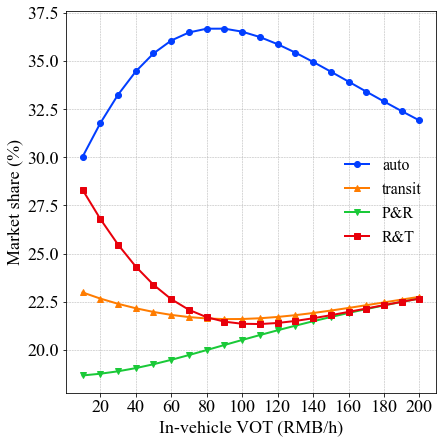

In [6]:
import seaborn as sns
sns.set_palette("bright", 10)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18

fig = plt.figure(figsize=(6.5,6.5))
markers = ['o','^','v','s','h','D','p','<','>']

ax = plt.subplot(1,1,1)
ax.grid(ls = '--', lw = 0.5, zorder = 0)
ax.plot(dfx['VOT_in'], dfx['auto_logit']*100, '-', lw=2, marker=markers[0], label='auto')
ax.plot(dfx['VOT_in'], dfx['bus_logit']*100, '-', lw=2, marker=markers[1], label='transit')
ax.plot(dfx['VOT_in'], dfx['PR_logit']*100, '-', lw=2, marker=markers[2], label='P&R')
ax.plot(dfx['VOT_in'], dfx['RT_logit']*100, '-', lw=2, marker=markers[3], label='R&T')
ax.set_xlabel('In-vehicle VOT (RMB/h)')
ax.set_ylabel('Market share (%)')
ax.set_xticks(np.arange(20, 210,20))
ax.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5) #, bbox_to_anchor=(0.7,0.7)
#ax.set_title('(b) Market share of different modes', fontsize=18, loc='center', y=1.02,)

plt.tight_layout()
plt.show()